# Compound Features from raw data
One of the most important parameters that decide irrespective of the learning model used(Perceptron,Decision Trees etc.) is the features or the input data itself.
If we can arrange the input data in a coherent way and do not take many features that convey more or less the same information we can improve the accuracy of our model to a great extent.
For example the Title of a person Mr. ,Mrs. carry the same information as that of Sex.So it will be redundant if we account for both in our model.Instead we can extract Titles from Names by RegularExpression matcher

In [1]:
import re
def get_title(name):
    search=re.search(' ([A-Za-z]+)\.',name)
    if search:
        return search.group(1)
        #.group returns the string matched by the regular expression if we find a valid one
    return ""

In [2]:
get_title("Cumings, Mrs. John Bradley Florence Briggs Thayer")
#Demonstration

'Mrs'

We also make use of the fact that in the Names the Title is always followed by a "."(which is why we use a escape sequence "/" to code it in our pattern).

In [3]:
'''Now to see how much the features Sex and Title are corellated we will use Pearson's corellation matrix which shows
corellation between two variables.One must also add a new coloumn Title in the original sheet'''
import pandas as pd
train=pd.read_csv('/home/vishal/Desktop/train(2).csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [4]:
train['Title']=train['Name'].apply(get_title)

In [5]:
train['Title'].head(3)
#To check whether everything works fine or not

0      Mr
1     Mrs
2    Miss
Name: Title, dtype: object

In [6]:
label=set(train['Title'])
#Checking no. of unique titles
print(label)

{'Mr', 'Sir', 'Master', 'Ms', 'Col', 'Mme', 'Don', 'Rev', 'Capt', 'Mrs', 'Jonkheer', 'Dr', 'Major', 'Countess', 'Mlle', 'Miss', 'Lady'}


In [7]:
train['Title']=train['Title'].replace('Mlle','Miss')
train['Title']=train['Title'].replace('Ms','Miss')
train['Title']=train['Title'].replace('Mme','Miss')

In [8]:
dict={"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Col": 5,
      "Countess":6,"Don":7,"Sir":8,"Lady":9,"Capt":10,"Rev":11
      ,"Jonkheer":12,"Major":13,"Dr":14}
unique_title=("Mr","Master","Mrs","Miss","Col","Countess"
              ,"Don","Sir","Lady","Capt","Rev","Jonkheer"
              ,"Major","Dr")
            

In [9]:
train["Title"]=train['Title'].apply(lambda x:dict[x])


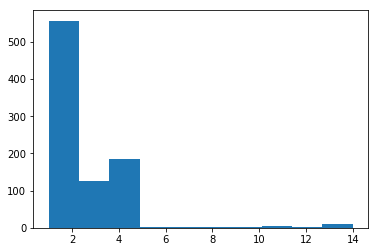

In [10]:
import matplotlib.pyplot as plt
plt.hist(train['Title'])
plt.show()

As we can see that the titles Jonkheer, Dr and others are rare we could just simply group them under a 'Rare' group

In [11]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
#Replacing some similar titles and replacing the rare titles by 'Rare' tag

In [ ]:
'''From this feature by examinig the correlation matrix we can observe a few things and improve out the accuracy ,like
most of the people who had a title Mr. died'''